# ****Jabodetabek Apartment Price Dataset****

**Welcome**!

This is my individual project about apartment in Jakarta and its surrounding ( Bogor, Depok, Tangerang, and Bekasi ). I got this data from scraping website *jendela360.com* ( I did web scraping in another place ) and since I collected them on **6
January 2022**, all the informations here, including price and other features, might be different when you compare the real price on the website and the data in my notebook right now

So, what will we do?
- Find out the important things that have a significance effect for model-predicting apartment prices
- Create a model to predict the price based on our independent variables

I will separate the **cleaning** and **modelling** process into different notebooks. So, here we're gonna do some cleaning stuff to make the data suitable to be input in our model later

First thing first, we have to understand the data that we have. There are 25 independent variables and one dependent variable in our dataset. Here for more details:
1. **Apartment_name**
2. **Link** ( we'll keep it, since if any data is detected missing while doing the cleaning process, we could check them from the link that we have )
3. **Unit Name** ( all of these values are unique )
4. **Area** ( The area of each unit, measured in square meters )
5. **Room** ( Studio, 1 Bedroom, 2 Bedrooms, 3 Bedrooms, 4 Bedrooms )
6. **Furnished** ( Fully, Semi, Unfurnished )
7. **Bathroom** ( The number of bathrooms )
8. **Region** ( Jakarta, Bogor, Depok, Tangerang, Bekasi )
9. **ANNUAL PRICE** ( *LABEL / DEPENDENT VARIABLE* )
10. **ATM**
11. **Cable TV**
12. **Function Room**
13. **Grocery Store**
14. **Gym**
15. **Internet**
16. **Basketball Court**
17. **Jogging Track**
18. **Swimming Pool**
19. **Laundry**
20. **Restaurant**
21. **Security**
22. **Playground**
23. **AC**
24. **Access card**
25. **Water heater**
26. **Washing machine**
27. **Kitchen**
28. **Dining set**
29. **Fridge**
30. **Bed**
31. **Tv**
32. **Full Name Apartment**

number 10 till 22 above are Apartment Facilities. It means that all units which the same ***apartment_name*** have same **apartment_facilities**

# What will we  get here?

1. Jakarta Selatan is the most of number having apartment unit
2. Average annual price based on number of rooms : 4 BR > 3 BR > 2 BR > 1 BR > Studio
3. The larger the area, the more expensive the price
4. There are only 2% of data that should be removed to make it suitable for the next step, modelling process ( 7420 raws into 7290 )

# Cleansing Process

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',100)
rcParams['figure.figsize'] = (17,5)
rcParams['axes.grid'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.spines.left'] = False
rcParams['boxplot.flierprops.linewidth'] = 0.6
rcParams['boxplot.flierprops.markersize'] = 3
rcParams['boxplot.boxprops.linewidth'] = 0.6
plt.rc('axes',axisbelow=True)

***I often use the matplotlib format above in my project ( manipulate with rcParams ). Since, Imo, the output of the graph looks better than just using standard parameters***

In [3]:
df = pd.read_csv('D:/Data/apartment/fr/apartment_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      7452 non-null   object
 1   web-scraper-start-url  7452 non-null   object
 2   link                   7444 non-null   object
 3   link-href              7452 non-null   object
 4   apt_name               7452 non-null   object
 5   room                   7452 non-null   object
 6   bathroom               7452 non-null   object
 7   Furnished              7452 non-null   object
 8   Area                   7452 non-null   object
 9   annual_price           7452 non-null   object
 10  apt_facilities         7372 non-null   object
 11  unit facilities        7452 non-null   object
 12  region                 7452 non-null   object
 13  unit_name              7452 non-null   object
dtypes: object(14)
memory usage: 815.2+ KB


There are **7452 raws** with **14 columns**. All of data types above are objects. We have to change some of them into numeric

- Some values in *apt_facilities* are missing, we'll handle it later
- There are only **14 columns** above since the Apartment and Unit facilities haven't been broken down into per item. Besides that, we'll remove first and second columns, then change **"link"** into **"full_name_apartment"** and **"link-href"** to **"link"**

The *"full_name_apartment"* can be used **to validate** the number of rooms and type of furnished as this column contains full information about that. **We don't know if the website inputs all the information perfectly, right?** 

For example ( I haven't checked it, just for example ) : In "full_name_apartment" column contains 'Studio type', but at the same row, the value in room column for that unit is 1BR ( They are different. When we have Studio, it means that all the unit facilities are placed in only one room including our bed. However, if we have 1BR type, there is another room besides bedroom for placing another unit facilities, such as for TV and Fridge )

In [5]:
df = df.drop(['web-scraper-order','web-scraper-start-url'],axis=1,errors='ignore').rename({'link':'full_apartment_name','link-href':'link'},axis=1)
df.sample(2)

,full_apartment_name,link,apt_name,room,bathroom,Furnished,Area,annual_price,apt_facilities,unit facilities,region,unit_name
1867,Bassura City Apartment 2BR Furnished,https://jendela360.com/sewa-apartemen-bassura-...,Bassura City Apartment,2 BR,1 Kamar Mandi,Fully Furnished,45 m2,"55,000,000",ATMCable TVFunction RoomGrocery StoreGymIntern...,ACAccess Card(s)KitchenDining SetRefrigeratorB...,Jakarta Timur,Unit bscc334
7103,Mediterania Palace Kemayoran 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-meditera...,Mediterania Palace Kemayoran,2 BR,1 Kamar Mandi,2 BR,36 m2,"40,000,000",ATMCable TVFunction RoomGrocery StoreGymIntern...,ACAccess Card(s)KitchenDining SetRefrigeratorW...,Jakarta Pusat,Unit mpkc021


# Breaking down facilities

*As previously mentioned, we have to split the facilities column*

## Apt facilites

In [6]:
new_cols = ['atm','basketball_court','cable_tv','function_room','grocery_store','gym','internet','jogging_track','swimming_pool','tennis_court','laundry','restaurant','security','playground']
df[new_cols] = pd.DataFrame([[0]*len(new_cols)],index=df.index)
df.head(2)

,full_apartment_name,link,apt_name,room,bathroom,Furnished,Area,annual_price,apt_facilities,unit facilities,region,unit_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground
0,Thamrin Executive Residence 1BR View City,https://jendela360.com/sewa-apartemen-thamrin-...,Thamrin Executive Residence,1 BR,1 Kamar Mandi,Fully Furnished,42 m2,"90,000,000",ATMBasket Ball CourtCable TVFunction RoomGroce...,ACAccess Card(s)Water HeaterKitchenDining SetR...,Jakarta Pusat,Unit terb001,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Puri Orchard Apartment 1BR Non Furnished,https://jendela360.com/sewa-apartemen-puri-orc...,Puri Orchard Apartment,1 BR,1 Kamar Mandi,Non Furnished,35 m2,"44,000,000",ATMCable TVFunction RoomGrocery StoreGymIntern...,ACAccess Card(s)KitchenDining SetBed(s)* Kelen...,Jakarta Barat,Unit pucb172,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Create empty lists for each apt_facilities and input the value to assign into DataFrame

In [7]:
def breakdown_apt_facilities(df):
    for n,col in zip(range(len(new_cols)),new_cols):
        globals()[col] = []
        n += 1

    # input into item variable
    for a in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('atm')].index.tolist():
        atm.append(a)
    df.loc[atm,'atm'] = 1

    for b in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('basket')].index.tolist():
        basketball_court.append(b)
    df.loc[basketball_court,'basketball_court'] = 1

    for c in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('cable')].index.tolist():
        cable_tv.append(c)
    df.loc[cable_tv,'cable_tv'] = 1

    for d in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('function')].index.tolist():
        function_room.append(d)
    df.loc[function_room,'function_room'] = 1

    for e in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('grocery')].index.tolist():
        grocery_store.append(e)
    df.loc[grocery_store,'grocery_store'] = 1

    for f in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('gym')].index.tolist():
        gym.append(f)
    df.loc[gym,'gym'] = 1

    for g in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('interne')].index.tolist():
        internet.append(g)
    df.loc[internet,'internet'] = 1

    for h in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('jogging')].index.tolist():
        jogging_track.append(h)
    df.loc[jogging_track,'jogging_track'] = 1

    for i in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('pool')].index.tolist():
        swimming_pool.append(i)
    df.loc[swimming_pool,'swimming_pool'] = 1

    for j in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('laundr')].index.tolist():
        laundry.append(j)
    df.loc[laundry,'laundry'] = 1

    for k in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('restaura')].index.tolist():
        restaurant.append(k)
    df.loc[restaurant,'restaurant'] = 1

    for l in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('securit')].index.tolist():
        security.append(l)
    df.loc[security,'security'] = 1

    for m in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('playgroun')].index.tolist():
        playground.append(m)
    df.loc[playground,'playground'] = 1

    for n in df[~(df.apt_facilities.isna())][df.apt_facilities.dropna().str.lower().str.contains('tennis')].index.tolist():
        tennis_court.append(n)
    df.loc[tennis_court,'tennis_court'] = 1

In [8]:
breakdown_apt_facilities(df)

## Unit Facilities

In [9]:
df.replace({'unit facilities':{'Kelengkapan unit dapat berubah sewaktu-waktu. Harap pastikan terlebih dahulu ke staff Jendela360.':'',
                               '\* ':''
                              }},regex=True,inplace=True)

In [10]:
df['unit facilities'].sample(5).values

array(['AC',
       'ACAccess Card(s)Water HeaterKitchenDining SetRefrigeratorWashing MachineBed(s)TV',
       'ACAccess Card(s)Water HeaterKitchen',
       'ACAccess Card(s)Water HeaterKitchenDining SetRefrigeratorBed(s)TV',
       'ACAccess Card(s)Water HeaterKitchenDining SetRefrigeratorWashing MachineBed(s)TV'],
      dtype=object)

***New column for each unit facility item***

In [11]:
new_cols1 = ['ac','access_card','water_heater','washing_machine','kitchen','dining_set','fridge','bed','tv']
df[new_cols1] = pd.DataFrame([[0]*len(new_cols1)],index=df.index)

for n, col1 in zip(range(len(new_cols1)),new_cols1):
    globals()[col1] = []
    n+=1

unit     = df['unit facilities']
contain  = unit.dropna().str.lower().str

for aa in df[~(unit.isna())][contain.contains('ac')].index.tolist():
    ac.append(aa)
df.loc[ac,'ac'] = 1

for bb in df[~(unit.isna())][contain.contains('card')].index.tolist():
    access_card.append(bb)
df.loc[access_card,'access_card'] = 1

for cc in df[~(unit.isna())][contain.contains('heater')].index.tolist():
    water_heater.append(cc)
df.loc[water_heater,'water_heater'] = 1

for dd in df[~(unit.isna())][contain.contains('machine')].index.tolist():
    washing_machine.append(dd)
df.loc[washing_machine,'washing_machine'] = 1

for ee in df[~(unit.isna())][contain.contains('kitchen')].index.tolist():
    kitchen.append(ee)
df.loc[kitchen,'kitchen'] = 1

for ff in df[~(unit.isna())][contain.contains('dining')].index.tolist():
    dining_set.append(ff)
df.loc[dining_set,'dining_set'] = 1

for gg in df[~(unit.isna())][contain.contains('refrige')].index.tolist():
    fridge.append(gg)
df.loc[fridge,'fridge'] = 1

for hh in df[~(unit.isna())][contain.contains('bed')].index.tolist():
    bed.append(hh)
df.loc[bed,'bed'] = 1

for ii in df[~(unit.isna())][contain.contains('tv')].index.tolist():
    tv.append(ii)
df.loc[tv,'tv'] = 1

In [12]:
df.sample(2)

,full_apartment_name,link,apt_name,room,bathroom,Furnished,Area,annual_price,apt_facilities,unit facilities,region,unit_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground,ac,access_card,water_heater,washing_machine,kitchen,dining_set,fridge,bed,tv
6733,Bintaro Icon Apartment 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-bintaro-...,Bintaro Icon Apartment,2 BR,1 Kamar Mandi,2 BR,35 m2,"90,000,000",ATMFunction RoomGrocery StoreInternetSwimming ...,ACAccess Card(s)KitchenDining SetRefrigeratorB...,Tangerang Selatan,Unit bicc001,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,1
551,Grand Dhika City Apartment Studio Fully Furnished,https://jendela360.com/sewa-apartemen-grand-dh...,Grand Dhika City Apartment,Studio,1 Kamar Mandi,Fully Furnished,24 m2,"42,000,000",Jogging TrackSwimming PoolRestaurantSecurityPl...,ACWater HeaterKitchenDining SetRefrigeratorBed...,Bekasi,Unit gdca014,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1


# Fixing values in bathroom, furnished, and area columns

In [13]:
df[(df.Furnished.str.contains('m2')|(df.Furnished.str.contains('BR')))].sample(3)

,full_apartment_name,link,apt_name,room,bathroom,Furnished,Area,annual_price,apt_facilities,unit facilities,region,unit_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground,ac,access_card,water_heater,washing_machine,kitchen,dining_set,fridge,bed,tv
7304,Bintaro Park View 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-bintaro-...,Bintaro Park View,2 BR,1 Kamar Mandi,2 BR,38 m2,"57,110,000",ATMCable TVFunction RoomGrocery StoreGymIntern...,ACAccess Card(s)KitchenDining SetRefrigeratorB...,Jakarta Selatan,Unit bpvc003,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1
6357,Puri Orchard Apartment 1BR Semi Furnished,https://jendela360.com/sewa-apartemen-puri-orc...,Puri Orchard Apartment,1 BR,1 Kamar Mandi,1 BR,21 m2,"32,000,000",ATMCable TVFunction RoomGrocery StoreGymIntern...,ACAccess Card(s)KitchenBed(s),Jakarta Barat,Unit pucb164,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0
5902,Signature Park Grande 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-signatur...,Signature Park Grande,2 BR,1 Kamar Mandi,2 BR,32 m2,"70,600,000",ATMCable TVFunction RoomGrocery StoreGymIntern...,ACAccess Card(s)Water HeaterKitchenRefrigerato...,Jakarta Timur,Unit sgpc067,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1


The values in three columns above are incorrect. We have to shift them

In [14]:
furnished = df[df.bathroom.str.contains('Furnished')].bathroom
area = df[df.Furnished.str.contains('m2')].Furnished

In [15]:
df.loc[furnished.index,'Furnished'] = furnished.values
df.loc[area.index,'Area'] = area.values

Make : ***bathroom doesn't contain 'Kamar Mandi'***,  ***furnished contains 'BR'***, and ***Area does not contain 'm2'*** into **ZERO**

Then, we will validate them with the *"full_apartment_name"*

In [16]:
df.loc[area.index.tolist()+furnished.index.tolist(),'bathroom'] = '0'
df.loc[df[df.Furnished.str.contains('BR')].index,'Furnished'] = '0'
df.loc[df[~(df.Area.str.contains('m2'))].index,'Area'] = '0'

**Furnished**

In [17]:
no_nan_df = df.full_apartment_name.isna() 

nonfurnished          = df.full_apartment_name.dropna().str.contains('Non Furnished')
nonfurnished_idx_full = df[~no_nan_df][(df.Furnished=='0')&(nonfurnished)].index

semifurnished = df.full_apartment_name.dropna().str.contains('Semi Furnished')
semifurnished_idx_full = df[~no_nan_df][(df.Furnished=='0')&(semifurnished)].index

fullfurnished = df.full_apartment_name.dropna().str.contains('Fully Furnished')
fullfurnished_idx_full = df[~no_nan_df][(df.Furnished=='0')&(fullfurnished)].index

fullfurnished1 = df.full_apartment_name.dropna().str.contains('Full Furnis')
fullfurnished_idx_full1 = df[~no_nan_df][(df.Furnished=='0')&(fullfurnished1)].index

#Change dataframe Furnished column
df.loc[nonfurnished_idx_full,'Furnished'] = 'Non Furnished'
df.loc[semifurnished_idx_full,'Furnished'] = 'Semi Furnished'
df.loc[fullfurnished_idx_full.tolist()+fullfurnished_idx_full1.tolist(),'Furnished'] = 'Fully Furnished'

After non furnished and semi furnished were **fixed**, we will assign 'full_apartment_name' that only contains('Furnished') into Fully Furnished type since most of them that only contains 'Furnished' are 'Fully Furnished'. So, we will use that information to assign the Furnished which still NaN

In [18]:
furnished = df.drop(index=df[~no_nan_df][fullfurnished].index.tolist()+df[~no_nan_df][fullfurnished1].index.tolist()+df[~no_nan_df][nonfurnished].index.tolist()+df[~no_nan_df][semifurnished].index.tolist())
df.loc[furnished[~(furnished.full_apartment_name.isna())][(furnished.full_apartment_name.dropna().str.contains('Furnished')&(furnished.Furnished=='0'))].index,'Furnished']='Fully Furnished'

# Handling the columns that still have missing values

In [19]:
df.loc[df[df.Furnished=='Studio'].index,'Furnished'] = '0'
df.loc[df[df.Furnished=='0'].index,'Furnished'] = np.nan
df.loc[df[df.Area=='0'].index,'Area'] = np.nan

In [20]:
df.isna().sum()

full_apartment_name       8
link                      0
apt_name                  0
room                      0
bathroom                  0
Furnished              1124
Area                    110
annual_price              0
apt_facilities           80
unit facilities           0
region                    0
unit_name                 0
atm                       0
basketball_court          0
cable_tv                  0
function_room             0
grocery_store             0
gym                       0
internet                  0
jogging_track             0
swimming_pool             0
tennis_court              0
laundry                   0
restaurant                0
security                  0
playground                0
ac                        0
access_card               0
water_heater              0
washing_machine           0
kitchen                   0
dining_set                0
fridge                    0
bed                       0
tv                        0
dtype: int64

We will impute four columns above (  *full_apartment_name*, *Furnished*, *apt_facilities*, *Area* ) with statistical methods for now. If there are detected some abnormal or not suitable with other columns, we will take care of that later in **Handling Outliers section**

In [21]:
df.replace({'Area':{'m2':''}},regex=True,inplace=True)
df['Area'] = df['Area'].astype(float)

In [22]:
cat_na = df.columns[df.isna().sum()>0].tolist()
cat_na.remove('Area')
df['Area'].fillna(df['Area'].median(),inplace=True)

for i in cat_na:
    df[i].fillna(df[i].mode()[0],inplace=True)

Don't forget to **break down** the **apartment facilities** *( Actually, I want to do this section for the first, but for make the notebook structure neatly, we will do that here. That's why I create the function for apt facilities )*

In [23]:
breakdown_apt_facilities(df)

Validate *'studio' furnished* with *full_apartment_name* values since 'studio' should be in "room", **not in Furnished**

In [24]:
df.loc[df[df.Furnished=='Studio'][df[df.Furnished=='Studio'].full_apartment_name.str.contains('Fully Furnished')].index,'Furnished'] = 'Fully Furnished'
df.loc[df[df.Furnished=='Studio'][df[df.Furnished=='Studio'].full_apartment_name.str.contains('Non Furnished')].index,'Furnished'] = 'Non Furnished'
df.loc[df[df.Furnished=='Studio'][df[df.Furnished=='Studio'].full_apartment_name.str.contains('Semi Furnished')].index,'Furnished'] = 'Semi Furnished'

# Region

We only put **Jakarta** region and its surrounding ( *Bogor, Tangerang, Depok, Bekasi* )

In [25]:
df.region.value_counts()

Jakarta Selatan      2180
Jakarta Barat        1661
Jakarta Pusat        1398
Tangerang             596
Jakarta Timur         522
Jakarta Utara         474
Tangerang Selatan     248
Bekasi                162
Depok                 157
Surabaya               24
Bandung                23
Bogor                   3
Sumedang                1
Karawang                1
Semarang                1
Sidoarjo                1
Name: region, dtype: int64

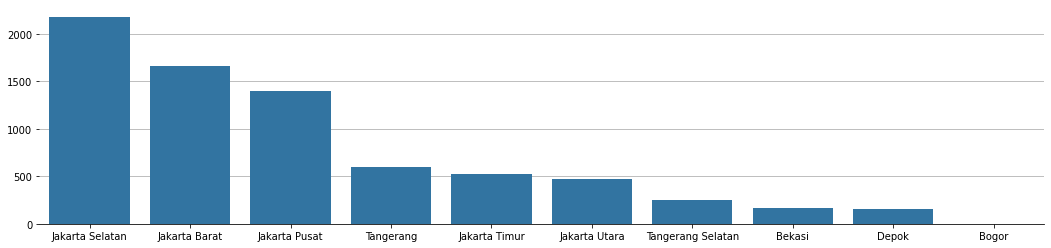

In [26]:
df = df[(df.region.str.contains('Jakarta'))|(df.region.str.contains('Depok'))|(df.region.str.contains('Tangerang'))|(df.region.str.contains('Bekasi'))|(df.region.str.contains('Bogor'))]
plt.figure(figsize=(18,4))
sns.countplot(df.region,color='tab:blue',order=df.region.value_counts().index)
plt.ylabel('')
plt.xlabel('')
plt.show()

**Jakarta Selatan** is the most here. Also we can look that 'Jakarta' region **have more unit** than **its surronding** *( Tangerang, Bogor, Depok, and Bekasi )*

Instead in the form of region name, we will change it into **longitude** and **latitude** forms

In [27]:
df['Latitude'] = 0
df['Longitude'] = 0

In [28]:
jaksel = df[df.region=='Jakarta Selatan']
jakut =  df[df.region=='Jakarta Utara']
jaktim =  df[df.region=='Jakarta Timur']
jakbar =  df[df.region=='Jakarta Barat']
jakpus =  df[df.region=='Jakarta Pusat']
depok =  df[df.region=='Depok']
tangsel =  df[df.region=='Tangerang Selatan']
bekasi =  df[df.region=='Bekasi']
bogor =  df[df.region=='Bogor']
tangerang =  df[df.region=='Tangerang']

In [29]:
df.loc[jaksel.index,'Latitude']  = -6.261493
df.loc[jaksel.index,'Longitude'] = 106.810600
df.loc[jakpus.index,'Latitude']  = -6.1805
df.loc[jakpus.index,'Longitude'] = 106.8284
df.loc[jakut.index,'Latitude'] = -6.138414
df.loc[jakut.index,'Longitude'] = 106.8927
df.loc[jaktim.index,'Latitude'] = -6.225014
df.loc[jaktim.index,'Longitude'] = 106.9004
df.loc[jakbar.index,'Latitude'] = -6.1674
df.loc[jakbar.index,'Longitude'] = 106.7637
df.loc[bogor.index,'Latitude'] = -6.5518
df.loc[bogor.index,'Longitude'] = 106.6291
df.loc[depok.index,'Latitude'] = -6.4025
df.loc[depok.index,'Longitude'] = 106.7942
df.loc[tangsel.index,'Latitude'] = -6.2835
df.loc[tangsel.index,'Longitude'] = 106.7113
df.loc[tangerang.index,'Latitude'] = -6.1702
df.loc[tangerang.index,'Longitude'] = 106.6403
df.loc[bekasi.index,'Latitude'] = -6.2734
df.loc[bekasi.index,'Longitude'] = 106.9831

# Understand the Data with Visualization

- Since the apt facilities and unit facilities seem to have no meaning anymore, we will remove them for computational and time efficiency
- Remove 'm2' in Area column

In [30]:
df_new = df.copy().drop(['apt_name','apt_facilities','unit facilities'],axis=1)

Change some columns into numerical type

In [31]:
df_new['annual_price'] = df_new.annual_price.apply(lambda x:str(x).replace(',','')).astype(int)
df_new['bathroom'] = df_new.bathroom.apply(lambda y:str(y).replace('Kamar Mandi',''))

## Numerical columns

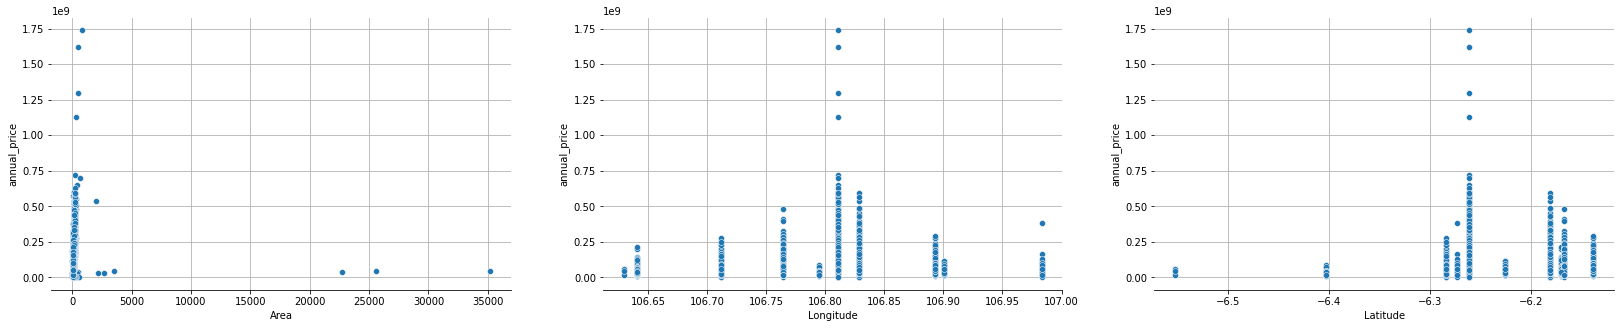

In [32]:
num = ['Area','Longitude','Latitude']

plt.figure(figsize=(28,5))
for col in range(len(num)):
    plt.subplot(1,3,col+1)
    sns.scatterplot(df_new[num[col]],df_new.annual_price)

### Area

Check area outliers

In [33]:
df_new[df_new['Area']>5000].head(3)

,full_apartment_name,link,room,bathroom,Furnished,Area,annual_price,region,unit_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground,ac,access_card,water_heater,washing_machine,kitchen,dining_set,fridge,bed,tv,Latitude,Longitude
244,Puri Orchard Apartment 1BR Fully Furnished,https://jendela360.com/sewa-apartemen-puri-orc...,1 BR,1,Fully Furnished,35200.0,47000000,Jakarta Barat,Unit pucb206,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,-6.1674,106.7637
2360,Madison Park 1BR View kolam berenang,https://jendela360.com/sewa-apartemen-madison-...,1 BR,1,Fully Furnished,25590.0,45000000,Jakarta Barat,Unit mapb040,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,-6.1674,106.7637
4554,Transpark Cibubur Apartment Studio Furnished,https://jendela360.com/sewa-apartemen-transpar...,Studio,1,Fully Furnished,22752.0,40000000,Depok,Unit trca002,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,-6.4025,106.7942


- Divide the area more than > 10000 m2 with thousand
- Divide the area more than > 1000 m2 with hundred


In [34]:
df_new.loc[df_new[df_new['Area']>10000].index,'Area'] = df_new.loc[df_new[df_new['Area']>10000].index,'Area']/1000
df_new.loc[df_new[df_new['Area']>1000].index,'Area'] = df_new.loc[df_new[df_new['Area']>1000].index,'Area']/100

- Handle outliers, divide area values whose have : 200 m2 < Area < 600 m2 and Annual Price < 2,500,000,000

In [35]:
df_new.loc[df_new[(df_new.Area<600)&(df_new.Area>200)&(df_new.annual_price<0.25e9)].index,'Area'] = df_new.loc[df_new[(df_new.Area<600)&(df_new.Area>200)&(df_new.annual_price<0.25e9)].index,'Area']/10

Some of them have annual price in dollar currency. Thus, we have to convert them into Rupiah which **1 dollar** is **Rp14,418.50**
- Reference : https://www.bi.go.id/id/statistik/informasi-kurs/transaksi-bi/default.aspx ( 6 January 2022 )

In [36]:
df_new.loc[df_new[df_new['annual_price']<100000].index,'annual_price'] = df_new.loc[df_new[df_new['annual_price']<100000].index,'annual_price']*14418.50

In [37]:
df_new = df_new[df_new.Area<400]

In [38]:
df_new.loc[df_new[(df_new.annual_price>0.5e9)&(df_new.Area<50)].index,'Area'] = df_new[(df_new.annual_price>0.5e9)&(df_new.Area<50)]['Area']*10
df_new.drop(index=df_new[(df_new.Area==200)].index.tolist()+df_new[(df_new['Area']>400)].index.tolist(),inplace=True)

In [39]:
df_new.loc[df_new[(df_new['Area']>300)&(df_new.annual_price<0.4e9)].index,'Area'] = df_new[(df_new['Area']>300)&(df_new.annual_price<0.4e9)]['Area']/10

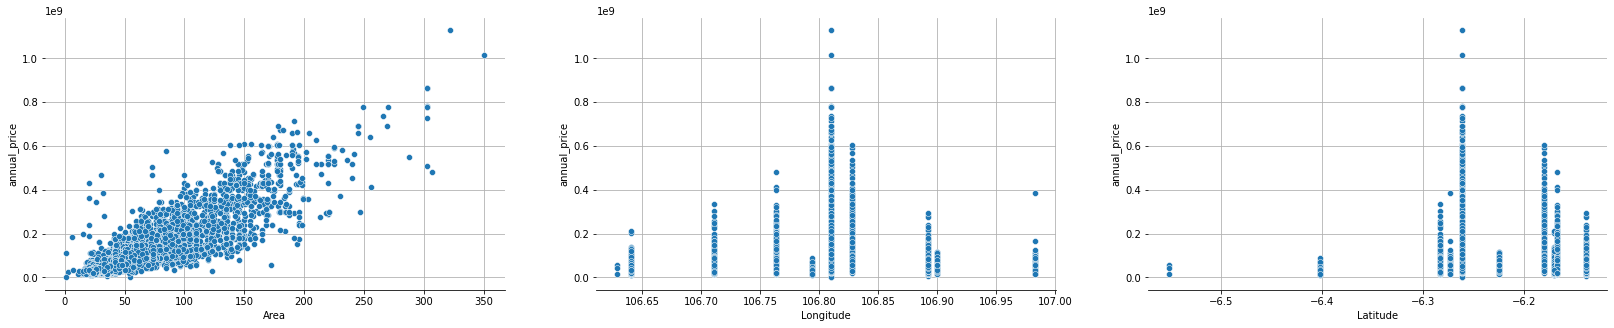

In [40]:
plt.figure(figsize=(28,5))
for col in range(len(num)):
    plt.subplot(1,3,col+1)
    sns.scatterplot(df_new[num[col]],'annual_price',data=df_new)

In [41]:
df_new = df_new[df_new.Area>10]

## Categorical columns

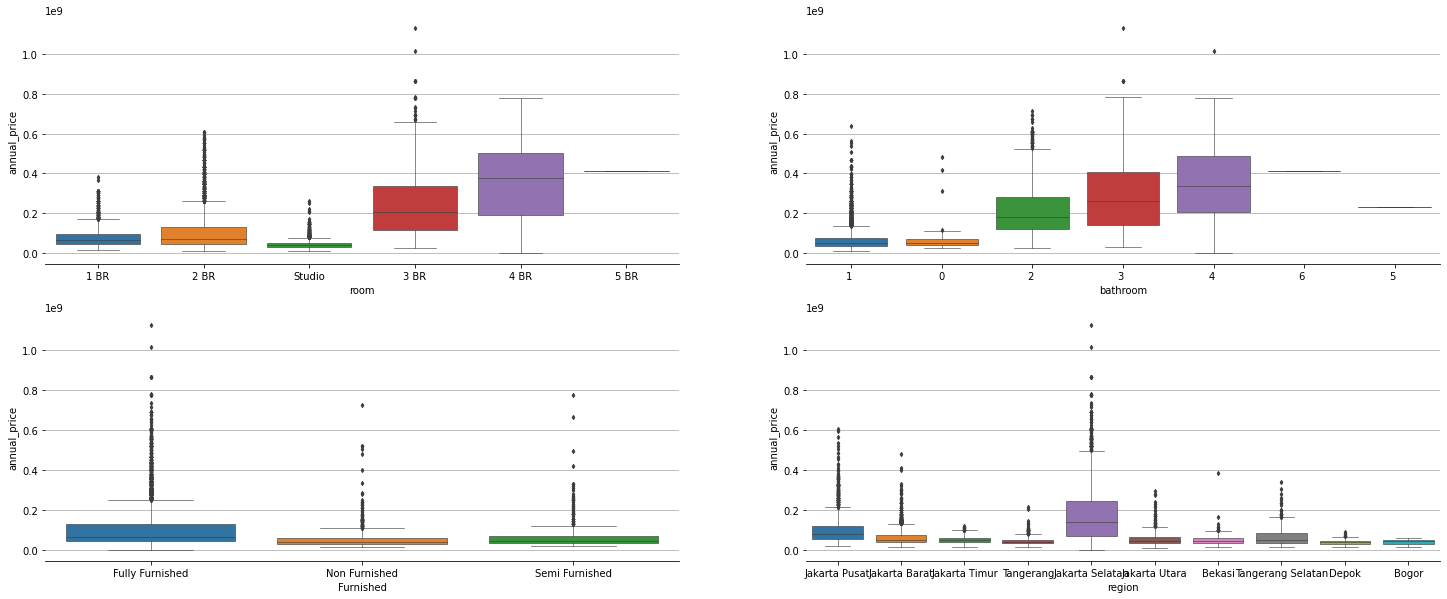

In [42]:
cat = df_new.select_dtypes('object').drop(['full_apartment_name','unit_name','link'],axis=1).columns

plt.figure(figsize=(25,10))
for col1 in range(len(cat)):
    plt.subplot(2,2,col1+1)
    sns.boxplot(df_new[cat[col1]],df_new.annual_price,fliersize=3,linewidth=0.6)

### Bathroom

- Looks like 0 bathroom type has cheap price. We will change it into 1 bathroom because doesn't make sense if the unit doesn't have the bathroom
- Since the 5 and 6 bathrooms only have 2 values and the distribution doesn't look good, we will assign them into 4 bathroom types

In [43]:
df_new.replace({'bathroom':{'1 ':'1',
                            '0':'1',
                            '5 ':'4 ',
                            '6 ':'4 '
                           }},inplace=True)

### Room

In [44]:
df_new.replace({'room':{'5 BR':'4 BR'}},inplace=True)

In [45]:
# Check 3Br type

In [46]:
df_new.drop(df_new[(df_new.room=='3 BR')&(df_new.annual_price>0.7e9)].index,inplace=True)
df_new.drop(df_new[(df_new.room=='2 BR')&(df_new.annual_price>0.6e9)].index,inplace=True)

<AxesSubplot:xlabel='annual_price', ylabel='room'>

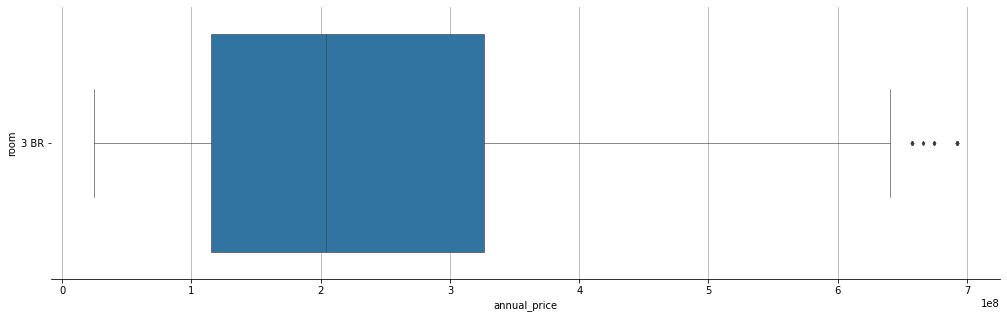

In [47]:
sns.boxplot(y='room',x='annual_price',data=df_new[df_new.room=='3 BR'],orient='h',fliersize=3,linewidth=0.6)

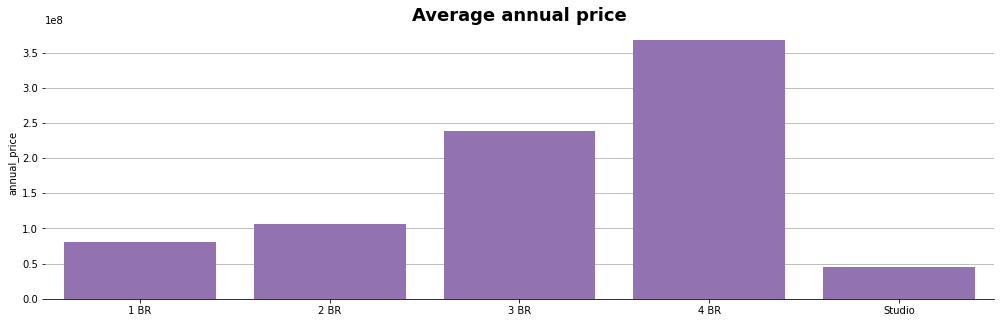

In [48]:
sns.barplot('room','annual_price',data=df_new.groupby('room').mean().reset_index(),color='tab:purple')
plt.title('Average annual price',size=18,fontweight=550)
plt.xlabel('')
plt.show()

### Region

Check Bekasi

<AxesSubplot:xlabel='annual_price'>

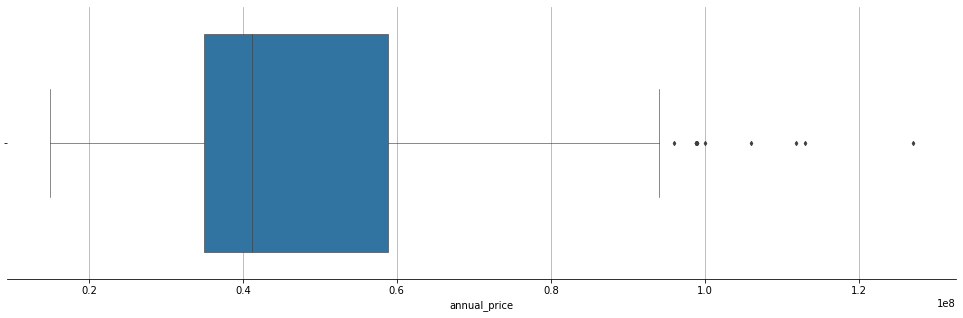

In [49]:
bekasi_new = df_new[df_new.region=='Bekasi']
outlier = bekasi_new[bekasi_new.annual_price>1.6e8]
sns.boxplot('annual_price',data=bekasi_new.drop(index=outlier.index),fliersize=3,linewidth=0.6)

In [50]:
df_new.drop(index=outlier.index,inplace=True)

In [51]:
df_new

,full_apartment_name,link,room,bathroom,Furnished,Area,annual_price,region,unit_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground,ac,access_card,water_heater,washing_machine,kitchen,dining_set,fridge,bed,tv,Latitude,Longitude
0,Thamrin Executive Residence 1BR View City,https://jendela360.com/sewa-apartemen-thamrin-...,1 BR,1,Fully Furnished,42.00,90000000.0,Jakarta Pusat,Unit terb001,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,-6.180500,106.8284
1,Puri Orchard Apartment 1BR Non Furnished,https://jendela360.com/sewa-apartemen-puri-orc...,1 BR,1,Non Furnished,35.00,44000000.0,Jakarta Barat,Unit pucb172,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,-6.167400,106.7637
2,Bassura City Apartment 2BR View City,https://jendela360.com/sewa-apartemen-bassura-...,2 BR,1,Fully Furnished,54.00,70000000.0,Jakarta Timur,Unit bscc469,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,-6.225014,106.9004
3,Puri Park View Apartment Studio Fully Furnished,https://jendela360.com/sewa-apartemen-puri-par...,Studio,1,Fully Furnished,24.00,25000000.0,Jakarta Barat,Unit ppva064,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,-6.167400,106.7637
4,Puri Orchard Apartment Studio Non Furnished,https://jendela360.com/sewa-apartemen-puri-orc...,Studio,1,Semi Furnished,26.00,24000000.0,Jakarta Barat,Unit puca086,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,-6.167400,106.7637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447,Bassura City Apartment 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-bassura-...,2 BR,1,Fully Furnished,48.00,58800000.0,Jakarta Timur,Unit bscc484,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,-6.225014,106.9004
7448,Sky House BSD Apartment Studio Non Furnished,https://jendela360.com/sewa-apartemen-sky-hous...,Studio,1,Fully Furnished,20.00,35300000.0,Tangerang,Unit skha016,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,-6.170200,106.6403
7449,Green Park View Apartment Studio Tower G,https://jendela360.com/sewa-apartemen-green-pa...,Studio,1,Fully Furnished,23.75,20000000.0,Jakarta Barat,Unit gpva032,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,0,1,0,-6.167400,106.7637
7450,The Mansion Kemayoran Jasmine 2BR Non Furnished,https://jendela360.com/sewa-apartemen-the-mans...,2 BR,1,Non Furnished,70.00,55000000.0,Jakarta Pusat,Unit tmjc012,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,-6.180500,106.8284


# Facilities

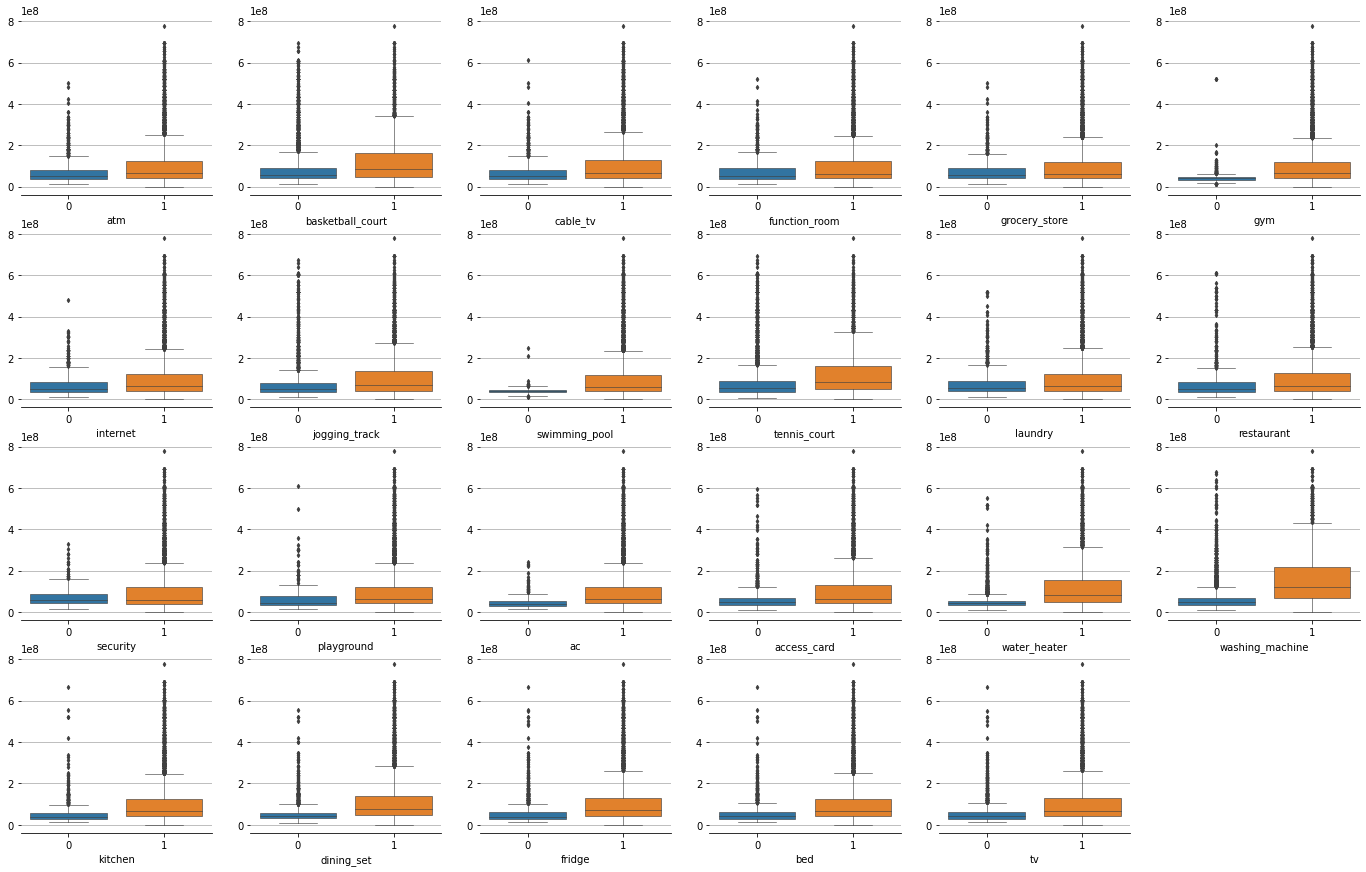

In [52]:
col_encoded = df_new.iloc[:,9:-2].columns.tolist()
plt.figure(figsize=(24,15))
for col2 in range(len(col_encoded)):
    plt.subplot(4,6,col2+1)
    sns.boxplot(df_new[col_encoded[col2]],df_new.annual_price,fliersize=3,linewidth=0.6)
    plt.ylabel('')

**Remove outliers**

Since the outliers are not a lot, I prefer to remove them manually so that the distribution is more controlled and suitable with my preference

In [53]:
df_new1 = df_new.copy()
df_new1.drop(index=df_new1[(df_new1.kitchen==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.gym==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.internet==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.cable_tv==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.function_room==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.atm==1)&(df_new1.annual_price>758599000)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.tv==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.fridge==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.swimming_pool==0)&(df_new1.annual_price>2e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.grocery_store==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.laundry==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.washing_machine==0)&(df_new1.annual_price>4.5e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.access_card==0)&(df_new1.annual_price>4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.water_heater==0)&(df_new1.annual_price>=4e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.bed==0)&(df_new1.annual_price>=3.8e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.dining_set==0)&(df_new1.annual_price>=3.9e8)].index,inplace=True)
df_new1.drop(index=df_new1[(df_new1.playground==0)&(df_new1.annual_price>=3.2e8)].index,inplace=True)

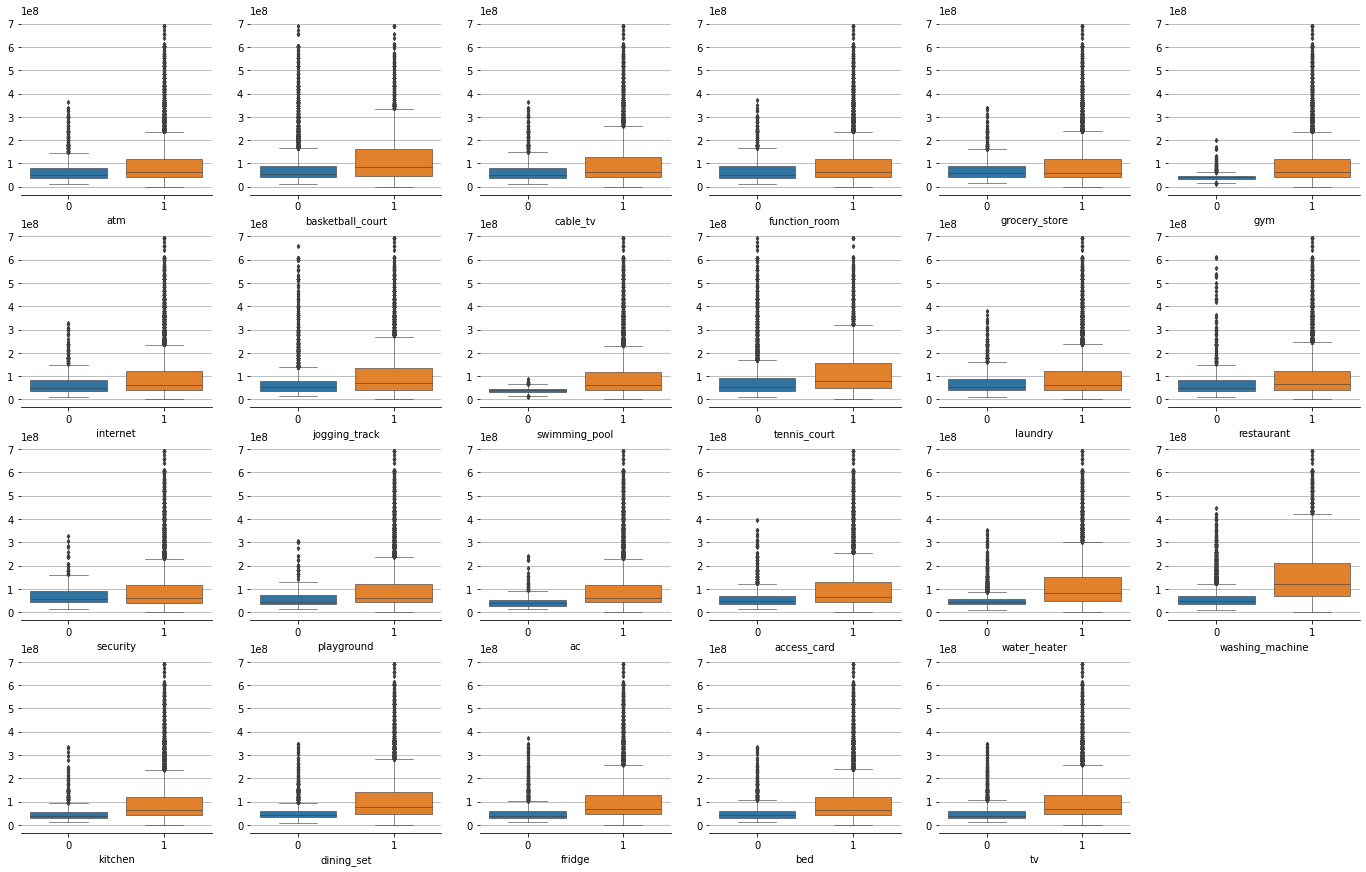

In [54]:
col_encoded = df_new1.iloc[:,9:-2].columns.tolist()
plt.figure(figsize=(24,15))
for col2 in range(len(col_encoded)):
    plt.subplot(4,6,col2+1)
    sns.boxplot(df_new1[col_encoded[col2]],df_new1.annual_price,fliersize=3,linewidth=0.6)
    plt.ylabel('')

In [55]:
df_new1.to_csv('D:/Data/apartment/fr/cleaned_1.csv',index=False)